<div style="text-align: right">Submitted by: Goutham Kumar R <br/>Notebook created on: 8th October 2020</div>

## Problem Statement:
Data = cars.csv
Predictors = [Cylinders, Weight, Horsepower]
Target = MPG

You will remove all the observations for which MPG and Horsepower is zero.
Do a scaling - do standardization of all the predictors ((X-mean)/sd) [This won't make it standard normal distributed) - This is done beacuse different variables are measured in different scales.

Keep aside one random observation from the dataset as test. (DO NOT include that observation for training the algorithm)

you need to build a kNN algorithm for regression.

kNN(trainX, trainY, testX, k)

### Libraries

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')                            #for high res graph

from IPython.core.interactiveshell import InteractiveShell   
InteractiveShell.ast_node_interactivity = "all"          #for debugging purpose

import warnings           
warnings.filterwarnings("ignore")                        #ignore warnings

### Loading Dataset

In [2]:
data = pd.read_csv('cars.csv')
data.shape

(406, 9)

In [3]:
data.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [4]:
#selecting features that are required for the prblm.st
df = data[['MPG','Cylinders','Weight','Horsepower']]
df.shape

(406, 4)

### Cleaning

In [5]:
#summary
df.describe()

,MPG,Cylinders,Weight,Horsepower
count,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,2979.413793,103.529557
std,8.401777,1.712160,847.004328,40.520659
min,0.000000,3.000000,1613.000000,0.000000
25%,17.000000,4.000000,2226.500000,75.000000
50%,22.350000,4.000000,2822.500000,93.500000
75%,29.000000,8.000000,3618.250000,129.000000
max,46.600000,8.000000,5140.000000,230.000000


In [6]:
#Removing 0-values from MPG(it can be electric), 0- values in Horsepower doesn't make sense(ManualError/Outlier)
df = df[(df[['MPG','Horsepower']] != 0).all(axis = 1)]
df.shape

(392, 4)

### Features

In [7]:
#Seperating independent(Predictors) and dependent(Target) variables
x = df.drop(['MPG'], axis =1)  #predictors
y = df['MPG']                  #targets

x.shape , y.shape

((392, 3), (392,))

### Standardization of predictors - Center Scaling

In [8]:
#since out test ds contains only one record, we are scaling the entire dataset here and then splittng the records as train-test.
#scaling using inbuilt function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
#converting back to df
x = pd.DataFrame(x_scaled , columns = x.columns)

In [9]:
x.head()  #verifying the scaled df

,Cylinders,Weight,Horsepower
0,1.483947,0.620540,0.664133
1,1.483947,0.843334,1.574594
2,1.483947,0.540382,1.184397
3,1.483947,0.536845,1.184397
4,1.483947,0.555706,0.924265


### Train - Test Split

In [10]:
#according to problem statement
#1st row is test data, rest all is train data
X_train= x.iloc[1:392] 
y_train = y.iloc[1:392]

X_test = x.iloc[0:1,[0,1,2]] #inorder to preserve X_test type as a df, it is indexed like this.
y_test = y.iloc[0] #Final Target

In [11]:
X_train.shape , y_train.shape

X_train.head() #checking the train dataset , whether split is perfect! 

y_train.head() 

((391, 3), (391,))

,Cylinders,Weight,Horsepower
1,1.483947,0.843334,1.574594
2,1.483947,0.540382,1.184397
3,1.483947,0.536845,1.184397
4,1.483947,0.555706,0.924265
5,1.483947,1.607198,2.433030


1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
Name: MPG, dtype: float64

In [12]:
X_test #Test variables

,Cylinders,Weight,Horsepower
0,1.483947,0.62054,0.664133


In [13]:
y_test #Target that has to predicted

18.0

### kNN- Regression Algorithm

In [14]:
def dist(X_train,y_train,X_test,K = 5):
    """Calculates the Eucledaian Distance between the Predictors and Targets.
       Arguments: X_train, y_train -> training dataset(Predictors)
                  X_test -> test dataset(Target)
                  k  -> 'K' value of kNN (default k value is 5)
        Return value : distance """
    
    distance = [] #initiating empty distance list
    
    for i in range(len(X_train)):
        eucDistance = 0
        for j in range(len(X_train.columns)):   
                eucDistance += np.sqrt((X_train.iloc[i,j]-X_test[j])**2)  #eucleadian distance formula
        distance.append((eucDistance,i,y_train.iloc[i])) 
        distance = sorted(distance, key = lambda x: x[0])[0:K]            #sorts the list based on the values of keys
        
    return distance

def kNN_algo(X_train,y_train,X_test,K = 5):
    """ Basic kNN Regression Algorthim
                   1. It find the nearest neigbours (using dist fn) and the value of 'k'.
                   2. Using the mean of the nearest neighbours it predicts the result.
        Arguments: X_train, y_train -> training dataset(Predictors)
                   X_test -> test dataset(Target)
                   k  -> 'K' value of kNN (default k value is 5)
        Return value: result -> It is the mean of 'k' nearest neighbours. """
    
    N = [] #initiating empty list for nearest neighbours
    result = []  #empty list for storing the average of top 'k' neighbours
    
    for i in range(len(X_test)):
        N.append(dist(X_train,y_train,X_test.iloc[i,:],K))
    
    for i in N:  #Calculating mean for the elements in N-> Nearest Neighbours
        mean = 0
        for j in i:
            mean += j[-1]
        mean = mean/K
        result.append(mean)
        
    return result

def Accuracy(K):
    """Calcualtes the accuracy of the model
       Arguments: k  -> the range of 'k' values for which this model has to be tested.
       Plots "Accuracy vs K - Neighbours"
       Returns the Accuracy Table -> Maxmimum Accuracy and its corresponding k-value 
    """
    Accuracy =[] 
    
    for i in range(1,K):  #k value 
        prediction = kNN_algo(X_train,y_train,X_test, K = i)
        a = (1-(abs((y_test - prediction)/(y_test))))*100   #testing the accuracy of the result, 
        Accuracy.append(a)                                         #how much percentage is the prediction varying from y_test.
    
    #plots 
    plt.figure(figsize=(12,12))
    plt.plot(range(1,100),Accuracy)
    plt.xlabel('K Neighbors')
    plt.ylabel('Accuracy %')
    plt.title('Accuracy of the model') 
    
    print("\n**Accuracy table**\n")
    K_V = [i for i in range(1,K)]  #creating a k-value list
    Acc_df = pd.DataFrame({'K-value':K_V,'Accuracy%':Accuracy})
    Acc_df = Acc_df.sort_values('Accuracy%', ascending = False).groupby('K-value').head(10)   #sorting the df column-> Accuracy%
    print(Acc_df.head(10).to_string(index = False))    #Displaying top 10 Maximum accuracy and its corresponding k-value
    return Acc_df                                        #hidding index to avoid confusion.

### Optimum k - value


**Accuracy table**

 K-value            Accuracy%
      13  [99.52991452991452]
      12  [99.49074074074073]
       5  [98.88888888888889]
      14  [98.76984126984128]
      16  [98.54166666666664]
       2  [97.77777777777779]
      15  [97.74074074074073]
       4  [97.22222222222221]
      17  [96.99346405228756]
      11  [96.91919191919189]


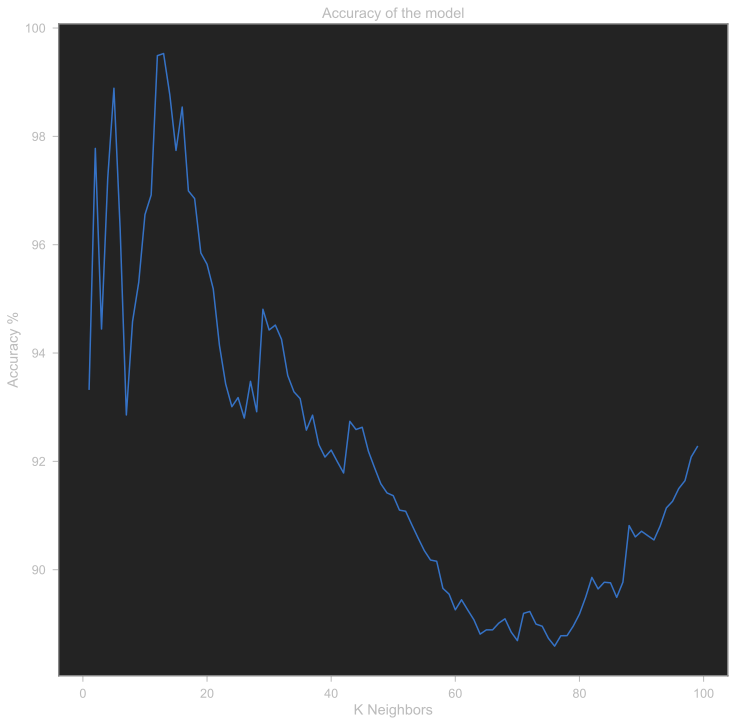

In [15]:
#Finding the optimum k- value for this dataset
#k- value range 1 to 100
A = Accuracy(K = 100)

From the above table and graph, it is evident that the optimum k-value for this dataset is <br/> <font size="5" color="Lime"><b>k = 13</b></font></t>

### Final Result

In [16]:
Final_prediction = kNN_algo(X_train, y_train, X_test, K= 13)  #Using kNN regression predicting the MPG value

In [17]:
print("The Actual MPG value is: ", y_test)
print("The predicted MPG value is: ", *Final_prediction)

print("\nThe Accuracy of the model for k=13 is:",*np.round((A.iloc[0,1]),2),"%") #Displaying the Best Accuracry and its corresponding k-value

The Actual MPG value is:  18.0
The predicted MPG value is:  17.915384615384614

The Accuracy of the model for k=13 is: 99.53 %


***

### User Friendly

In [18]:
#Allowing the user to change the k-values, and displaying MPG and the accuracy of the model for that particular k-value
k_value = int(input("Please enter a 'k' value for the kNN Regression:"))  
Test_output = kNN_algo(X_train, y_train, X_test, K= k_value)

print("The Actual MPG value is: ", y_test)
print("The predicted MPG value is: ", *np.round(Test_output,2))

print("\nAccuracy of the model is:\n",A[A['K-value'] == k_value].to_string(index = False))  #Displays the Accuracy for the given k value
                                                                                                #removed index inorder to avoid confusion.

Please enter a 'k' value for the kNN Regression:10
The Actual MPG value is:  18.0
The predicted MPG value is:  17.38

Accuracy of the model is:
  K-value            Accuracy%
      10  [96.55555555555554]


***